In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [2]:
%cd '/content/gdrive/MyDrive/DL07_K304_ĐaoTuanThinh_TruongVanLe/Project1'

/content/gdrive/MyDrive/DL07_K304_ĐaoTuanThinh_TruongVanLe/Project1


In [3]:
!pip install ttth-mds5-analyzer
!pip install git+https://github.com/ydataai/ydata-profiling.git
!pip install underthesea -q
!pip install sentencepiece -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.6 MB/s eta 0:00:00
  Created wheel for ttth-mds5-analyzer: filename=ttth_mds5_analyzer-0.1.8-py3-none-any.whl size=102280 sha256=f4ff9c421366a291dc57ae3654e520a77372733038b3a25b2f2ac4b4b4b12d9b
  Stored in directory: /root/.cache/pip/wheels/c7/51/54/0e218dcefbcedad85821d1da97b0762b84a19a68206e36de26
Successfully built ttth-mds5-analyzer
  Cloning https://github.com/ydataai/ydata-profiling.git to /tmp/pip-req-build-co8exm68
  Running command git clone --filter=blob:none --quiet https://github.com/ydataai/ydata-profiling.git /tmp/pip-req-build-co8exm68
  Resolved https://github.com/ydataai/ydata-profiling.git to commit c3ce66ca4cc9564e013f71cbb96ed7b3d8f

In [5]:
# Thư viện cơ bản
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings("ignore")
from ydata_profiling import ProfileReport

# Thư viện xử lý dữ liệu
import string
import re
import regex
from underthesea import word_tokenize, pos_tag, sent_tokenize

# Thư viện cho Sentiment Analysis
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from nltk.probability import FreqDist
from sklearn.utils import resample

# Thư viện cho bài toán phân cụm
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation, PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

# Thư viện lưu mô hình
import joblib
from joblib import dump
from joblib import load

### Chuẩn bị dữ liệu

In [6]:
file_review = '/content/gdrive/MyDrive/DL07_K304_ĐaoTuanThinh_TruongVanLe/Project1/Dataset/Reviews.xlsx'
file_overview_review = '/content/gdrive/MyDrive/DL07_K304_ĐaoTuanThinh_TruongVanLe/Project1/Dataset/Overview_Reviews.xlsx'
file_overview_company = '/content/gdrive/MyDrive/DL07_K304_ĐaoTuanThinh_TruongVanLe/Project1/Dataset/Overview_Companies.xlsx'

In [7]:
# Đọc dữ liệu
review = pd.read_excel(file_review)
overview_review = pd.read_excel(file_overview_review)
overview_company = pd.read_excel(file_overview_company)
# Xem 5 dòng đầu
review.head()


,id,Company Name,Cmt_day,Title,What I liked,Suggestions for improvement,Rating,Salary & benefits,Training & learning,Management cares about me,Culture & fun,Office & workspace,Recommend?
0,4,Accenture,March 2025,"Môi trường thoải mái, ít áp lực, có thể làm vi...","Môi trường thoải mái, ít áp lực, có thể làm vi...",Cần đánh giá KPI khách quan và phân chia công ...,4,4,4,4,4,4,Yes
1,4,Accenture,January 2025,Công ty trẻ trung năng động,"Cơ sở vật chất đẹp, công ty trẻ trung năng độn...",Nên nghiên cứu lại range lương của thì trường....,4,3,4,4,4,5,Yes
2,4,Accenture,October 2023,Môi trường làm việc thoải mái vui vẻ,"Mội người thân thiện, giúp đỡ lẫn nhau. Chương...",Do công ty làm outsourcing về mảng system nên ...,3,3,3,3,3,3,Yes
3,4,Accenture,February 2025,good environment for fresher,good env. for fresher to learn and improve the...,Need to forcus more on benefit and evaluate co...,3,2,2,3,4,4,No
4,4,Accenture,February 2023,"Môi trường làm việc thoải mái, vui vẻ","- Văn phòng đẹp, cơ sở vật chất tốt\n- Sếp và ...",- Phát triển văn phòng để rộng rãi hơn\n- Công...,4,3,4,4,4,3,Yes


In [8]:
# Xem kích thước dữ liệu
review.shape

(8417, 13)

In [9]:
# Xem thông tin cơ bản
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           8417 non-null   int64 
 1   Company Name                 8417 non-null   object
 2   Cmt_day                      8417 non-null   object
 3   Title                        8417 non-null   object
 4   What I liked                 8416 non-null   object
 5   Suggestions for improvement  8412 non-null   object
 6   Rating                       8417 non-null   int64 
 7   Salary & benefits            8417 non-null   int64 
 8   Training & learning          8417 non-null   int64 
 9   Management cares about me    8417 non-null   int64 
 10  Culture & fun                8417 non-null   int64 
 11  Office & workspace           8417 non-null   int64 
 12  Recommend?                   8417 non-null   object
dtypes: int64(7), object(6)
memory usa

In [10]:
# Đổi tên cột Recommend? thành Recommend
review.rename(columns={'Recommend?':'Recommend'}, inplace=True)

In [11]:
# Thống kê mô tả cho dữ liệu số
review.describe()

,id,Rating,Salary & benefits,Training & learning,Management cares about me,Culture & fun,Office & workspace
count,8417.000000,8417.000000,8417.000000,8417.000000,8417.000000,8417.000000,8417.000000
mean,256.994178,4.072116,3.733872,3.960912,3.890460,4.069859,4.088393
std,114.732313,0.975290,1.071243,0.997510,1.091305,0.974663,0.905349
min,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,182.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000
50%,223.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,339.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,477.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [12]:
# Thống kê mô tả cho dữ liệu object
review.describe(include='object')

,Company Name,Cmt_day,Title,What I liked,Suggestions for improvement,Recommend
count,8417,8417,8417,8416,8412,8417
unique,180,107,6951,8405,7724,2
top,FPT Software,July 2021,Môi trường làm việc tốt,"Môi trường làm việc thoải mái, đồng nghiệp thâ...",Đi làm ở công ty này lương cao quá. k xứng đán...,Yes
freq,2014,284,147,2,8,7390


In [13]:
# Kiểm tra dữ liệu có bị thiếu không
review.isnull().sum()

,0
id,0
Company Name,0
Cmt_day,0
Title,0
What I liked,1
Suggestions for improvement,5
Rating,0
Salary & benefits,0
Training & learning,0
Management cares about me,0


In [14]:
# Xóa các dữ liệu bị thiếu
review.dropna(inplace=True)

In [15]:
# Xem lại kích thước
review.shape

(8411, 13)

In [16]:
# Xem các cột dữ liệu
review.columns

Index(['id', 'Company Name', 'Cmt_day', 'Title', 'What I liked',
       'Suggestions for improvement', 'Rating', 'Salary & benefits',
       'Training & learning', 'Management cares about me', 'Culture & fun',
       'Office & workspace', 'Recommend'],
      dtype='object')

In [ ]:
# # Xóa cột 'id','Cmt_day'
# review.drop(columns=['Cmt_day'], inplace=True)

In [17]:
# Kiểm tra dữ liệu có bị trùng lắp không
review.duplicated().sum()

np.int64(0)

In [18]:
review['Rating'].value_counts()

,count
Rating,
5,3505
4,2698
3,1638
2,446
1,124


In [19]:
overview_company.shape

(478, 13)

In [20]:
overview_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   id                            478 non-null    int64 
 1   Company Name                  478 non-null    object
 2   Company Type                  478 non-null    object
 3   Company industry              463 non-null    object
 4   Company size                  478 non-null    object
 5   Country                       478 non-null    object
 6   Working days                  476 non-null    object
 7   Overtime Policy               447 non-null    object
 8   Company overview              478 non-null    object
 9   Our key skills                321 non-null    object
 10  Why you'll love working here  379 non-null    object
 11  Location                      478 non-null    object
 12  Href                          478 non-null    object
dtypes: int64(1), object(

In [21]:
overview_company.columns

Index(['id', 'Company Name', 'Company Type', 'Company industry',
       'Company size', 'Country', 'Working days', 'Overtime Policy',
       'Company overview', 'Our key skills', 'Why you'll love working here',
       'Location', 'Href'],
      dtype='object')

In [22]:
overview_company = overview_company[['id', 'Company Type',
       'Company size', 'Country', 'Working days', 'Overtime Policy']]

In [23]:
data = pd.merge(review, overview_company, on='id')

In [24]:
data.head()

,id,Company Name,Cmt_day,Title,What I liked,Suggestions for improvement,Rating,Salary & benefits,Training & learning,Management cares about me,Culture & fun,Office & workspace,Recommend,Company Type,Company size,Country,Working days,Overtime Policy
0,4,Accenture,March 2025,"Môi trường thoải mái, ít áp lực, có thể làm vi...","Môi trường thoải mái, ít áp lực, có thể làm vi...",Cần đánh giá KPI khách quan và phân chia công ...,4,4,4,4,4,4,Yes,IT Service and IT Consulting,301-500 employees,Vietnam,Monday - Friday,No OT
1,4,Accenture,January 2025,Công ty trẻ trung năng động,"Cơ sở vật chất đẹp, công ty trẻ trung năng độn...",Nên nghiên cứu lại range lương của thì trường....,4,3,4,4,4,5,Yes,IT Service and IT Consulting,301-500 employees,Vietnam,Monday - Friday,No OT
2,4,Accenture,October 2023,Môi trường làm việc thoải mái vui vẻ,"Mội người thân thiện, giúp đỡ lẫn nhau. Chương...",Do công ty làm outsourcing về mảng system nên ...,3,3,3,3,3,3,Yes,IT Service and IT Consulting,301-500 employees,Vietnam,Monday - Friday,No OT
3,4,Accenture,February 2025,good environment for fresher,good env. for fresher to learn and improve the...,Need to forcus more on benefit and evaluate co...,3,2,2,3,4,4,No,IT Service and IT Consulting,301-500 employees,Vietnam,Monday - Friday,No OT
4,4,Accenture,February 2023,"Môi trường làm việc thoải mái, vui vẻ","- Văn phòng đẹp, cơ sở vật chất tốt\n- Sếp và ...",- Phát triển văn phòng để rộng rãi hơn\n- Công...,4,3,4,4,4,3,Yes,IT Service and IT Consulting,301-500 employees,Vietnam,Monday - Friday,No OT


In [25]:
# xem thông tin data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8411 entries, 0 to 8410
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           8411 non-null   int64 
 1   Company Name                 8411 non-null   object
 2   Cmt_day                      8411 non-null   object
 3   Title                        8411 non-null   object
 4   What I liked                 8411 non-null   object
 5   Suggestions for improvement  8411 non-null   object
 6   Rating                       8411 non-null   int64 
 7   Salary & benefits            8411 non-null   int64 
 8   Training & learning          8411 non-null   int64 
 9   Management cares about me    8411 non-null   int64 
 10  Culture & fun                8411 non-null   int64 
 11  Office & workspace           8411 non-null   int64 
 12  Recommend                    8411 non-null   object
 13  Company Type                 8411

In [26]:
# kiểm tra giá trị bị null
data.isnull().sum()

,0
id,0
Company Name,0
Cmt_day,0
Title,0
What I liked,0
Suggestions for improvement,0
Rating,0
Salary & benefits,0
Training & learning,0
Management cares about me,0


In [27]:
data[['Overtime Policy']].value_counts()

,count
Overtime Policy,
No OT,4669
Extra salary for OT,3135
Extra days off for OT,78


In [28]:
# Điền giá trị null trong biến Overtime Policy bằng ""
data['Overtime Policy'].fillna("", inplace=True)

In [29]:
data.isnull().sum()

,0
id,0
Company Name,0
Cmt_day,0
Title,0
What I liked,0
Suggestions for improvement,0
Rating,0
Salary & benefits,0
Training & learning,0
Management cares about me,0


### I. Tiền xử lý dữ liệu

In [30]:
#LOAD EMOJICON
file = open('/content/gdrive/MyDrive/DL07_K304_ĐaoTuanThinh_TruongVanLe/Project1/files/emojicon.txt', 'r', encoding="utf8")
emoji_lst = file.read().split('\n')
emoji_dict = {}
for line in emoji_lst:
    key, value = line.split('\t')
    emoji_dict[key] = str(value)
file.close()
#################
#LOAD TEENCODE
file = open('/content/gdrive/MyDrive/DL07_K304_ĐaoTuanThinh_TruongVanLe/Project1/files/teencode.txt', 'r', encoding="utf8")
teen_lst = file.read().split('\n')
teen_dict = {}
for line in teen_lst:
    key, value = line.split('\t')
    teen_dict[key] = str(value)
file.close()
###############
#LOAD TRANSLATE ENGLISH -> VNMESE
file = open('/content/gdrive/MyDrive/DL07_K304_ĐaoTuanThinh_TruongVanLe/Project1/files/english-vnmese.txt', 'r', encoding="utf8")
english_lst = file.read().split('\n')
english_dict = {}
for line in english_lst:
    key, value = line.split('\t')
    english_dict[key] = str(value)
file.close()
################
#LOAD wrong words
file = open('/content/gdrive/MyDrive/DL07_K304_ĐaoTuanThinh_TruongVanLe/Project1/files/wrong-word.txt', 'r', encoding="utf8")
wrong_lst = file.read().split('\n')
file.close()
#################
#LOAD STOPWORDS
file = open('/content/gdrive/MyDrive/DL07_K304_ĐaoTuanThinh_TruongVanLe/Project1/files/vietnamese-stopwords.txt', 'r', encoding="utf8")
stopwords_lst = file.read().split('\n')
file.close()

In [31]:
def process_text(text, emoji_dict, teen_dict, wrong_lst,english_dict):
    document = text.lower()
    document = document.replace("’",'')
    document = regex.sub(r'\.+', ".", document)
    new_sentence =''
    for sentence in sent_tokenize(document):
        # if not(sentence.isascii()):
        ###### CONVERT EMOJICON
        sentence = ''.join(emoji_dict[word]+' ' if word in emoji_dict else word for word in list(sentence))
        ###### CONVERT TEENCODE
        sentence = ' '.join(teen_dict[word] if word in teen_dict else word for word in sentence.split())
        ###### CONVERT ENGLISH ***
        sentence = ' '.join(english_dict[word] if word in english_dict else word for word in sentence.split())
        ###### DEL Punctuation & Numbers
        pattern = r'(?i)\b[a-záàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ]+\b'
        sentence = ' '.join(regex.findall(pattern,sentence))
        # ...
        ###### DEL wrong words
        sentence = ' '.join('' if word in wrong_lst else word for word in sentence.split())
        new_sentence = new_sentence+ sentence + '. '
    document = new_sentence
    #print(document)
    ###### DEL excess blank space
    document = regex.sub(r'\s+', ' ', document).strip()
    #...
    return document

In [32]:
data["text_processing"] = data[["What I liked", "Suggestions for improvement"]].fillna("").agg(" ".join, axis=1)

In [33]:
import re
# Hàm để chuẩn hóa các từ có ký tự lặp
def normalize_repeated_characters(text):
    # Thay thế mọi ký tự lặp liên tiếp bằng một ký tự đó
    # Ví dụ: "lònggggg" thành "lòng", "thiệtttt" thành "thiệt"
    return re.sub(r'(.)\1+', r'\1', text)

In [34]:
data["processed_text"] = data["text_processing"].apply(lambda x: normalize_repeated_characters(x))

In [35]:
data["processed_text"] = data["processed_text"].apply(lambda x: process_text(x, emoji_dict, teen_dict, wrong_lst,english_dict))

In [36]:
data[['text_processing','processed_text']].head()

,text_processing,processed_text
0,"Môi trường thoải mái, ít áp lực, có thể làm vi...",môi trường thoải mái ít áp lực có thể làm việc...
1,"Cơ sở vật chất đẹp, công ty trẻ trung năng độn...",cơ sở vật chất đẹp công trẻ năng động. chế độ ...
2,"Mội người thân thiện, giúp đỡ lẫn nhau. Chương...",mội người thân thiện giúp đỡ lẫn . chương trìn...
3,good env. for fresher to learn and improve the...,env. fresher đến learn và của chúng ability yê...
4,"- Văn phòng đẹp, cơ sở vật chất tốt\n- Sếp và ...",văn phòng đẹp cơ sở vật chất tốt sếp và đồng n...


In [37]:
# Chuẩn hóa unicode tiếng việt
def loaddicchar():
    uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
    unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"

    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic

# Đưa toàn bộ dữ liệu qua hàm này để chuẩn hóa lại
def covert_unicode(txt):
    dicchar = loaddicchar()
    return regex.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

In [38]:
data['processed_text'] = data['processed_text'].apply(lambda x: covert_unicode(x))

In [39]:
data[['text_processing','processed_text']].head()

,text_processing,processed_text
0,"Môi trường thoải mái, ít áp lực, có thể làm vi...",môi trường thoải mái ít áp lực có thể làm việc...
1,"Cơ sở vật chất đẹp, công ty trẻ trung năng độn...",cơ sở vật chất đẹp công trẻ năng động. chế độ ...
2,"Mội người thân thiện, giúp đỡ lẫn nhau. Chương...",mội người thân thiện giúp đỡ lẫn . chương trìn...
3,good env. for fresher to learn and improve the...,env. fresher đến learn và của chúng ability yê...
4,"- Văn phòng đẹp, cơ sở vật chất tốt\n- Sếp và ...",văn phòng đẹp cơ sở vật chất tốt sếp và đồng n...


In [40]:
# Xử lý từ ghép
def process_special_word(text):
  # Các từ có thể tạo cụm từ với các từ khác
    special_words = ['không', 'chưa', 'không phải', 'không đủ', 'quá', 'thiếu', 'tệ',
                     "môi trường", "công ty", "đồng nghiệp", "quản lý", "sếp", "hỗ trợ",
                     "sáng tạo", "hài lòng", "tốt", "văn hóa", "phát triển", "học hỏi", "cơ hội",
                     "đào tạo", "thăng tiến", "tăng trưởng", "khả năng", "chuyên nghiệp", "đồng đội", "văn phòng",
                     "hợp tác", "áp lực", "khó khăn", "chất lượng", "kém", "không rõ ràng", "mâu thuẫn"
]
    new_text = ''
    text_lst = text.split()
    i = 0

    while i < len(text_lst):
        word = text_lst[i]
        if word in special_words:
            next_idx = i + 1
            if next_idx < len(text_lst):
                word = word + '_' + text_lst[next_idx]
            i = next_idx + 1
        else:
            i += 1
        new_text = new_text + word + ' '

    return new_text.strip()

In [41]:
data['processed_text'] = data['processed_text'].apply(lambda x: process_special_word(x))

In [42]:
def process_postag_thesea(text):
    new_document = ''
    for sentence in sent_tokenize(text):
        sentence = sentence.replace('.','')
        ###### POS tag
        lst_word_type = ['N','Np','A','AB','V','VB','VY','R']
        # lst_word_type = ['A','AB','V','VB','VY','R']
        sentence = ' '.join( word[0] if word[1].upper() in lst_word_type else '' for word in pos_tag(process_special_word(word_tokenize(sentence, format="text"))))
        new_document = new_document + sentence + ' '
    ###### DEL excess blank space
    new_document = regex.sub(r'\s+', ' ', new_document).strip()
    return new_document

In [43]:
data['processed_text'] = data['processed_text'].apply(lambda x: process_postag_thesea(x))

In [44]:
# Remove Stopword
def remove_stopword(text, stopwords):
    ###### REMOVE stop words
    document = ' '.join('' if word in stopwords else word for word in text.split())
    #print(document)
    ###### DEL excess blank space
    document = regex.sub(r'\s+', ' ', document).strip()
    return document

In [45]:
data['processed_text'] = data['processed_text'].apply(lambda x: remove_stopword(x,stopwords_lst))

In [46]:
# Example positive/negative words and emojis (should be loaded from file in practice)
positive_words = [
    "thích", "tốt", "xuất sắc", "tuyệt vời", "ổn","hài lòng", "ưng ý", "hoàn hảo", "chất lượng", "nhanh",
    "thân thiện", "rất tốt", "rất thích", "tận tâm", "đáng tin cậy", "đẳng cấp","an tâm", "thúc đẩy", "cảm động",
    "nổi trội","sáng tạo", "phù hợp", "hiếm có", "cải thiện", "hoà nhã", "chăm chỉ", "cẩn thận",
    "vui vẻ", "hào hứng", "đam mê", 'chuyên', 'dễ', 'giỏi', 'hay', 'hiệu', 'hài', 'hỗ trợ', 'nhiệt tình',
    'thân', 'tuyệt', 'vui', 'chuyên nghiệp', 'động lực', 'dễ chịu','công bằng', 'hạnh phúc', 'hợp lý','truyền cảm hứng',
    'phát triển', 'nổi bật','hợp tác', 'đồng đội', 'hòa đồng', 'học hỏi', 'tôn trọng', 'tốt nhất', 'vui mừng', 'đẳng cấp',
    'dễ dàng', 'chủ động', 'đồng cảm', 'cảm', 'mở rộng', 'bình đẳng', 'năng động', 'thoải mái', 'mến', 'cảm ơn', 'tốt hơn','cởi mở', 'cơ hội'
]
negative_words = [
    "kém", "tệ", "buồn", "không dễ chịu", "không thích", "không ổn", "áp lực", "mệt","không đáng tin cậy", "không chuyên nghiệp",
    "không thân thiện", "không tốt", "chậm", "khó khăn", "phức tạp",
    "khó chịu", "gây khó dễ", "rườm rà", "tồi tệ", "khó xử", "không thể chấp nhận", "không rõ ràng",
    "rối rắm", 'không hài lòng', 'quá tệ', 'rất tệ', "phiền phức",
    'thất vọng', 'tệ hại', 'kinh khủng', 'chán', 'drama', 'dramas', 'gáp', 'gắt',
    'lỗi', 'ngắt', 'quái', 'quát', 'thiếu', 'trễ', 'tệp', 'tồi', "hách dịch",
    'căng thẳng', 'không hòa đồng', 'thiếu đào tạo', 'thiếu sáng tạo',
    'khủng hoảng', 'rối loạn', 'không có cơ hội', 'thiếu công bằng', 'không chấp nhận được',
    'không đủ', 'thiếu sự công nhận', 'thiếu hỗ trợ', 'không hợp', 'thiếu cơ hội thăng tiến', 'áp', 'trì trệ', 'thất bại',
    'thiếu sự minh bạch', 'buồn bã', 'rối', 'không đáng', 'mâu thuẫn',
    'thiếu chuyên nghiệp', 'thiếu động lực', 'lo lắng', 'môi trường thiếu cởi mở', 'mệt mỏi','lo'
    'thiếu linh hoạt', 'không tôn trọng', 'tức giận', 'không phát triển', 'thiếu sự rõ ràng', 'bực bội'
]
positive_emojis = [
    "😄", "😃", "😀", "😁", "😆",
    "😅", "🤣", "😂", "🙂", "🙃",
    "😉", "😊", "😇", "🥰", "😍",
    "🤩", "😘", "😗", "😚", "😙",
    "😋", "😛", "😜", "🤪", "😝",
    "🤗", "🤭", "🥳", "😌", "😎",
    "🤓", "🧐", "👍", "🤝", "🙌", "👏", "👋",
    "🤙", "✋", "🖐️", "👌", "🤞",
    "✌️", "🤟", "👈", "👉", "👆",
    "👇", "☝️", "💚", "💖"
]
negative_emojis = [
    "😞", "😔", "🙁", "☹️", "😕",
    "😢", "😭", "😖", "😣", "😩",
    "😠", "😡", "🤬", "😤", "😰",
    "😨", "😱", "😪", "😓", "🥺",
    "😒", "🙄", "😑", "😬", "😶",
    "🤯", "😳", "🤢", "🤮", "🤕",
    "🥴", "🤔", "😷", "🙅‍♂️", "🙅‍♀️",
    "🙆‍♂️", "🙆‍♀️", "🙇‍♂️", "🙇‍♀️", "🤦‍♂️",
    "🤦‍♀️", "🤷‍♂️", "🤷‍♀️", "🤢", "🤧",
    "🤨", "🤫", "👎", "👊", "✊", "🤛", "🤜",
    "🤚", "🖕"
]


In [47]:
# Mở rộng từ postive và negative
positive_words_extend = ['_'.join(word.split()) if len(word.split()) > 1 else word for word in positive_words]
# Bổ sung từ mới vào mảng cũ
positive_words.extend(positive_words_extend)

In [48]:
negative_words_extend = ['_'.join(word.split()) if len(word.split()) > 1 else word for word in negative_words]
# Bổ sung từ mới vào mảng cũ
negative_words.extend(negative_words_extend)

In [49]:
positive_words

['thích',
 'tốt',
 'xuất sắc',
 'tuyệt vời',
 'ổn',
 'hài lòng',
 'ưng ý',
 'hoàn hảo',
 'chất lượng',
 'nhanh',
 'thân thiện',
 'rất tốt',
 'rất thích',
 'tận tâm',
 'đáng tin cậy',
 'đẳng cấp',
 'an tâm',
 'thúc đẩy',
 'cảm động',
 'nổi trội',
 'sáng tạo',
 'phù hợp',
 'hiếm có',
 'cải thiện',
 'hoà nhã',
 'chăm chỉ',
 'cẩn thận',
 'vui vẻ',
 'hào hứng',
 'đam mê',
 'chuyên',
 'dễ',
 'giỏi',
 'hay',
 'hiệu',
 'hài',
 'hỗ trợ',
 'nhiệt tình',
 'thân',
 'tuyệt',
 'vui',
 'chuyên nghiệp',
 'động lực',
 'dễ chịu',
 'công bằng',
 'hạnh phúc',
 'hợp lý',
 'truyền cảm hứng',
 'phát triển',
 'nổi bật',
 'hợp tác',
 'đồng đội',
 'hòa đồng',
 'học hỏi',
 'tôn trọng',
 'tốt nhất',
 'vui mừng',
 'đẳng cấp',
 'dễ dàng',
 'chủ động',
 'đồng cảm',
 'cảm',
 'mở rộng',
 'bình đẳng',
 'năng động',
 'thoải mái',
 'mến',
 'cảm ơn',
 'tốt hơn',
 'cởi mở',
 'cơ hội',
 'thích',
 'tốt',
 'xuất_sắc',
 'tuyệt_vời',
 'ổn',
 'hài_lòng',
 'ưng_ý',
 'hoàn_hảo',
 'chất_lượng',
 'nhanh',
 'thân_thiện',
 'rất_tốt',


In [50]:
# Đếm từ truyền vào là tích cực hay tiêu cực.
def find_words(document, list_of_words):
    document_lower = document.lower()
    word_count = 0
    word_list = []

    for word in list_of_words:
        if word in document_lower:
            print(word)
            word_count += document_lower.count(word)
            word_list.append(word)

    return word_count, word_list

In [51]:
# Đếm từ tích cực, tiêu cực
data[['word_count_positive', 'word_list_positive']] = data['processed_text'].apply(lambda x: pd.Series(find_words(x, positive_words)))
data[['word_count_negative', 'word_list_negative']] = data['processed_text'].apply(lambda x: pd.Series(find_words(x, negative_words)))

Streaming output truncated to the last 5000 lines.
áp
khó_chịu
thiếu
thiếu
thiếu
thiếu
áp
áp_lực
áp
drama
drama
áp
áp_lực
áp
chậm
chậm
áp
áp_lực
áp
trễ
áp
áp_lực
trễ
áp
không_tốt
áp
áp_lực
áp
thiếu
thiếu
thiếu
thiếu
áp
áp
chán
thiếu
chán
thiếu
không_tốt
áp
áp_lực
không_tốt
áp
không_tốt
áp
áp
áp
áp
không_ổn
thiếu
thiếu
thiếu
áp
thiếu
áp
không_hài_lòng
thiếu
thiếu
phức_tạp
thiếu
áp
thiếu
áp
lỗi
lỗi
mệt
mệt
áp
không_ổn
áp
chậm
chậm
lỗi
áp
lỗi
áp
thiếu
thiếu
áp
áp
áp
áp_lực
áp
thiếu
thiếu
áp
áp
thiếu
thiếu
áp
áp
áp
áp
áp
áp
thất_vọng
áp
áp_lực
áp
chậm
chậm
áp
áp
mệt
mệt
không_hài_lòng
áp
áp
chán
chán
chậm
chậm
không_hài_lòng
áp
áp
không_rõ_ràng
lỗi
trễ
lỗi
trễ
áp
áp_lực
áp
áp
áp_lực
áp
chậm
chậm
mệt
mệt
trễ
trễ
thiếu
thiếu
thiếu_chuyên_nghiệp
mệt
mệt
mệt
mệt
chán
chán
áp
áp_lực
áp
chậm
chậm
thiếu
thiếu
kém
kém
drama
drama
mệt
mệt
drama
gắt
drama
gắt
drama
drama
áp
áp_lực
áp
thiếu
thiếu
thiếu
thiếu
kém
kém
thiếu
thiếu
lỗi
lỗi
áp
áp
chậm
chậm
áp
áp_lực
áp
thiếu
thiếu
thiếu
thiếu
áp
áp_lực
áp

In [53]:
# Gán nhãn cho dữ liệu
def assign_label(row):
    if row['Rating'] >= 4:
        return 'positive'
    elif row['Rating'] == 3:
        if row['word_count_positive'] > 0:
            return 'positive'
        else:
            return 'neutral'
    elif row['Rating'] < 3:
        if row['Rating'] == 0:
            if row['word_count_positive'] > 0:
                return 'positive'
            elif row['word_count_positive'] < row['word_count_negative']:
                return 'negative'
            else:
                return 'negative'
        else:
            return 'negative'


In [54]:
data['label'] = data.apply(assign_label, axis=1)
data.head()

,id,Company Name,Cmt_day,Title,What I liked,Suggestions for improvement,Rating,Salary & benefits,Training & learning,Management cares about me,...,Country,Working days,Overtime Policy,text_processing,processed_text,word_count_positive,word_list_positive,word_count_negative,word_list_negative,label
0,4,Accenture,March 2025,"Môi trường thoải mái, ít áp lực, có thể làm vi...","Môi trường thoải mái, ít áp lực, có thể làm vi...",Cần đánh giá KPI khách quan và phân chia công ...,4,4,4,4,...,Vietnam,Monday - Friday,No OT,"Môi trường thoải mái, ít áp lực, có thể làm vi...",môi_trường thoải_mái áp_lực làm_việc hybrid lư...,9,"[tốt, chuyên, tốt, cải_thiện, chuyên, chuyên_n...",3,"[áp, áp_lực, áp]",positive
1,4,Accenture,January 2025,Công ty trẻ trung năng động,"Cơ sở vật chất đẹp, công ty trẻ trung năng độn...",Nên nghiên cứu lại range lương của thì trường....,4,3,4,4,...,Vietnam,Monday - Friday,No OT,"Cơ sở vật chất đẹp, công ty trẻ trung năng độn...",cơ_sở_vật_chất đẹp_công trẻ chế_độ làm_việc hy...,1,[thoải_mái],0,[],positive
2,4,Accenture,October 2023,Môi trường làm việc thoải mái vui vẻ,"Mội người thân thiện, giúp đỡ lẫn nhau. Chương...",Do công ty làm outsourcing về mảng system nên ...,3,3,3,3,...,Vietnam,Monday - Friday,No OT,"Mội người thân thiện, giúp đỡ lẫn nhau. Chương...",mội thân_thiện giúp_đỡ lẫn chương_trình intern...,10,"[chuyên, hài, thân, hài_lòng, thân_thiện, sáng...",0,[],positive
3,4,Accenture,February 2025,good environment for fresher,good env. for fresher to learn and improve the...,Need to forcus more on benefit and evaluate co...,3,2,2,3,...,Vietnam,Monday - Friday,No OT,good env. for fresher to learn and improve the...,fresher learn ability yên_tĩnh opened flexible...,0,[],0,[],neutral
4,4,Accenture,February 2023,"Môi trường làm việc thoải mái, vui vẻ","- Văn phòng đẹp, cơ sở vật chất tốt\n- Sếp và ...",- Phát triển văn phòng để rộng rãi hơn\n- Công...,4,3,4,4,...,Vietnam,Monday - Friday,No OT,"- Văn phòng đẹp, cơ sở vật chất tốt\n- Sếp và ...",văn_phòng đẹp cơ_sở vật_chất tốt_sếp đồng_nghi...,11,"[tốt, thân, tốt, thân_thiện, thân, phát_triển,...",0,[],positive


In [55]:
# Xem thống kê biến rating_category
data.label.value_counts()

,count
label,
positive,7505
negative,570
neutral,336


In [56]:
df = data.copy()

In [57]:
df.head()

,id,Company Name,Cmt_day,Title,What I liked,Suggestions for improvement,Rating,Salary & benefits,Training & learning,Management cares about me,...,Country,Working days,Overtime Policy,text_processing,processed_text,word_count_positive,word_list_positive,word_count_negative,word_list_negative,label
0,4,Accenture,March 2025,"Môi trường thoải mái, ít áp lực, có thể làm vi...","Môi trường thoải mái, ít áp lực, có thể làm vi...",Cần đánh giá KPI khách quan và phân chia công ...,4,4,4,4,...,Vietnam,Monday - Friday,No OT,"Môi trường thoải mái, ít áp lực, có thể làm vi...",môi_trường thoải_mái áp_lực làm_việc hybrid lư...,9,"[tốt, chuyên, tốt, cải_thiện, chuyên, chuyên_n...",3,"[áp, áp_lực, áp]",positive
1,4,Accenture,January 2025,Công ty trẻ trung năng động,"Cơ sở vật chất đẹp, công ty trẻ trung năng độn...",Nên nghiên cứu lại range lương của thì trường....,4,3,4,4,...,Vietnam,Monday - Friday,No OT,"Cơ sở vật chất đẹp, công ty trẻ trung năng độn...",cơ_sở_vật_chất đẹp_công trẻ chế_độ làm_việc hy...,1,[thoải_mái],0,[],positive
2,4,Accenture,October 2023,Môi trường làm việc thoải mái vui vẻ,"Mội người thân thiện, giúp đỡ lẫn nhau. Chương...",Do công ty làm outsourcing về mảng system nên ...,3,3,3,3,...,Vietnam,Monday - Friday,No OT,"Mội người thân thiện, giúp đỡ lẫn nhau. Chương...",mội thân_thiện giúp_đỡ lẫn chương_trình intern...,10,"[chuyên, hài, thân, hài_lòng, thân_thiện, sáng...",0,[],positive
3,4,Accenture,February 2025,good environment for fresher,good env. for fresher to learn and improve the...,Need to forcus more on benefit and evaluate co...,3,2,2,3,...,Vietnam,Monday - Friday,No OT,good env. for fresher to learn and improve the...,fresher learn ability yên_tĩnh opened flexible...,0,[],0,[],neutral
4,4,Accenture,February 2023,"Môi trường làm việc thoải mái, vui vẻ","- Văn phòng đẹp, cơ sở vật chất tốt\n- Sếp và ...",- Phát triển văn phòng để rộng rãi hơn\n- Công...,4,3,4,4,...,Vietnam,Monday - Friday,No OT,"- Văn phòng đẹp, cơ sở vật chất tốt\n- Sếp và ...",văn_phòng đẹp cơ_sở vật_chất tốt_sếp đồng_nghi...,11,"[tốt, thân, tốt, thân_thiện, thân, phát_triển,...",0,[],positive


In [58]:
#Cân bằng dữ liệu
from sklearn.utils import resample

def balance_dataset(df, label_column='label', random_state=42):

    # Kiểm tra dữ liệu đầu vào
    if data.empty:
        raise ValueError("DataFrame đầu vào rỗng.")
    if label_column not in data.columns:
        raise ValueError(f"Cột '{label_column}' không tồn tại trong DataFrame.")

    # In số lượng mẫu trước khi cân bằng
    print("Số lượng mẫu trước khi cân bằng:")
    print(data[label_column].value_counts())

    # In thông tin về các cột để xác nhận
    print("\nCác cột trong DataFrame:", list(data.columns))

    # 1. Chia dữ liệu theo nhãn
    df_negative = df[df[label_column] == 'negative']
    df_neutral = df[df[label_column] == 'neutral']
    df_positive = df[df[label_column] == 'positive']

    # 2. Xác định số lượng mẫu lớn nhất
    max_count = max(len(df_negative), len(df_neutral), len(df_positive))

    # 3. Oversample các nhóm thiểu số
    df_negative_upsampled = resample(df_negative,
                                      replace=True,
                                      n_samples=max_count,
                                      random_state=random_state)

    df_neutral_upsampled = resample(df_neutral,
                                     replace=True,
                                     n_samples=max_count,
                                     random_state=random_state)

    # 4. Giữ nguyên nhóm positive
    df_positive_upsampled = df_positive

    # 5. Gộp lại thành dataset cân bằng
    df_balanced = pd.concat([df_negative_upsampled,
                            df_neutral_upsampled,
                            df_positive_upsampled])

    # 6. Shuffle dữ liệu
    df_balanced = df_balanced.sample(frac=1, random_state=random_state).reset_index(drop=True)

    # 7. In số lượng mẫu sau khi cân bằng
    print("\nSố lượng mẫu sau khi cân bằng:")
    print(df_balanced[label_column].value_counts())

    # Xác nhận các cột vẫn được giữ nguyên
    print("\nCác cột trong DataFrame cân bằng:", list(df_balanced.columns))

    return df_balanced

# Gọi hàm để cân bằng dữ liệu
df_balanced = balance_dataset(df)

# Nếu muốn ghi đè 'data' với phiên bản cân bằng
df = df_balanced

# Kiểm tra lại DataFrame 'data' sau khi cân bằng
print("\nKiểm tra DataFrame 'data' sau khi gán lại:")
print(df['label'].value_counts())
print("\nCác cột trong DataFrame cuối cùng:", list(data.columns))

Số lượng mẫu trước khi cân bằng:
label
positive    7505
negative     570
neutral      336
Name: count, dtype: int64

Các cột trong DataFrame: ['id', 'Company Name', 'Cmt_day', 'Title', 'What I liked', 'Suggestions for improvement', 'Rating', 'Salary & benefits', 'Training & learning', 'Management cares about me', 'Culture & fun', 'Office & workspace', 'Recommend', 'Company Type', 'Company size', 'Country', 'Working days', 'Overtime Policy', 'text_processing', 'processed_text', 'word_count_positive', 'word_list_positive', 'word_count_negative', 'word_list_negative', 'label']

Số lượng mẫu sau khi cân bằng:
label
negative    7505
positive    7505
neutral     7505
Name: count, dtype: int64

Các cột trong DataFrame cân bằng: ['id', 'Company Name', 'Cmt_day', 'Title', 'What I liked', 'Suggestions for improvement', 'Rating', 'Salary & benefits', 'Training & learning', 'Management cares about me', 'Culture & fun', 'Office & workspace', 'Recommend', 'Company Type', 'Company size', 'Country', '

In [59]:
label_sentiment = {'negative': 0, 'neutral': 1, 'positive': 2}
df['label_sentiment'] = df['label'].map(label_sentiment)
df.head()

,id,Company Name,Cmt_day,Title,What I liked,Suggestions for improvement,Rating,Salary & benefits,Training & learning,Management cares about me,...,Working days,Overtime Policy,text_processing,processed_text,word_count_positive,word_list_positive,word_count_negative,word_list_negative,label,label_sentiment
0,182,FPT Software,September 2019,Xin nghỉ việc là chắc chắn được tăng lương,Tăng lương cũng nhanh nhưng chả thấm gì so với...,"Không biết nói sao cho hết từ quản lý yếu kém,...",2,2,1,2,...,Monday - Friday,Extra salary for OT,Tăng lương cũng nhanh nhưng chả thấm gì so với...,lương chóng chả thấm công yếu kém_định_hướng p...,1,[phát_triển],2,"[kém, kém]",negative,0
1,253,KMS Technology,May 2017,"môi trường năng động, tuyệt vời",Mặc dù mình chỉ mới tham gia khóa train của KM...,Bãi giữ xe công ty hơi bất tiện\nVì là công ty...,5,3,4,4,...,Monday - Friday,No OT,Mặc dù mình chỉ mới tham gia khóa train của KM...,mặc_dù khóa_lửa kms_trọng môi_trường tuyệt_vời...,3,"[tuyệt, tuyệt_vời, tuyệt]",0,[],positive,2
2,253,KMS Technology,March 2023,Văn phòng xịn,"Phòng nghỉ + ăn chơi lầu 7 xịn, môi trường làm...","Bãi đỗ xe cho nhân viên quá bé, đỗ ngoài khá t...",4,3,4,4,...,Monday - Friday,No OT,"Phòng nghỉ + ăn chơi lầu 7 xịn, môi trường làm...",phòng nghỉ ăn_chơi lầu xịn môi_trường làm_việc...,5,"[tốt, thân, tốt, thân_thiện, thân]",0,[],positive,2
3,182,FPT Software,July 2019,Môi trường làm việc dành cho fresher,"không gian làm việc rộng rãi, đồng nghiệp nếu ...",Làm outsourcing và định hướng công ty là bán n...,2,1,3,2,...,Monday - Friday,Extra salary for OT,"không gian làm việc rộng rãi, đồng nghiệp nếu ...",không_làm rộng_rãi đồng_nghiệp hợp dự_án outso...,0,[],2,"[mệt, mệt]",negative,0
4,215,Hitachi Digital Services,October 2017,"Cả năm không tăng lương, Onsite ki bo từng đồn...","Có nhiều loại trợ cấp. Có nhiều hoạt động vui,...",Nói review 1 năm 2 lần mà thực tế chỉ có 1 lần...,2,1,3,1,...,Monday - Friday,No OT,"Có nhiều loại trợ cấp. Có nhiều hoạt động vui,...",hoạt_động đội building đi onsite_tính vé bus b...,5,"[chuyên, giỏi, chuyên, giỏi, phát_triển]",0,[],negative,0


In [89]:
# Lưu file xử lý về dạng csv
df.to_csv('/content/gdrive/MyDrive/DL07_K304_ĐaoTuanThinh_TruongVanLe/Project1/final_data.csv', index=False)
print('Lưu file thành công')

Lưu file thành công


In [60]:
df['label_sentiment'].value_counts()

,count
label_sentiment,
0,7505
2,7505
1,7505


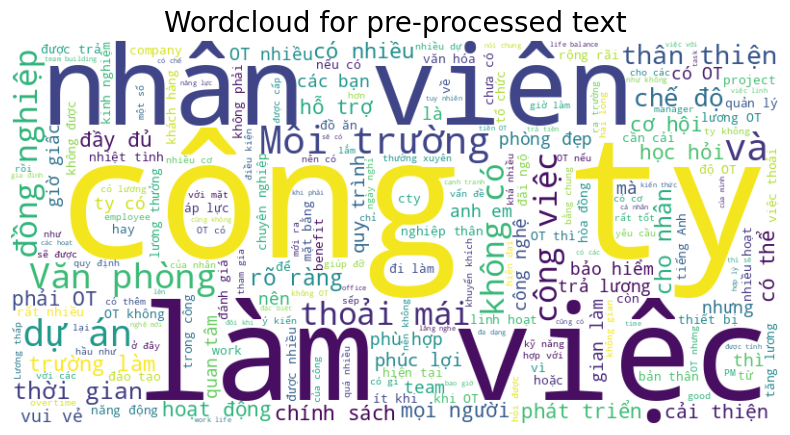

In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Tạo chuỗi văn bản từ cột text_processing
text_propressing = ' '.join(data['text_processing'])

# Tạo Wordcloud từ văn bản
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_propressing)

# Hiển thị Wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud for pre-processed text', fontsize=20)
plt.show()

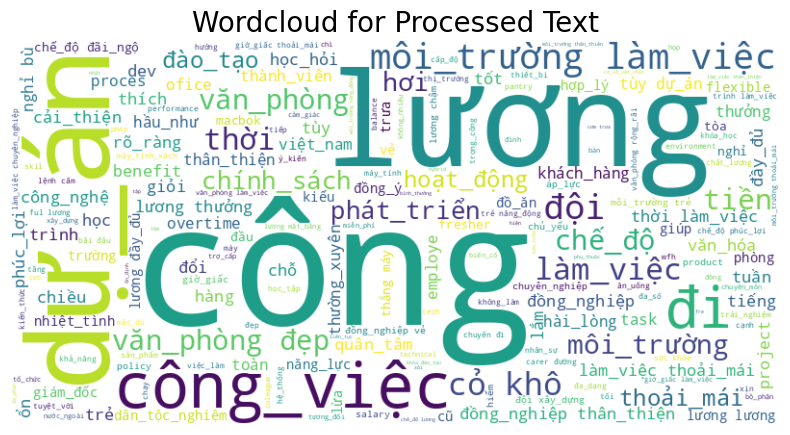

In [62]:
# Tạo chuỗi văn bản từ cột processed_text
all_text = ' '.join(data['processed_text'])

# Tạo Wordcloud từ văn bản
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Hiển thị Wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud for Processed Text', fontsize=20)
plt.show()

In [64]:
# Các biến numeric
num_cols = df.select_dtypes(include= 'number').columns
num_cols

Index(['id', 'Rating', 'Salary & benefits', 'Training & learning',
       'Management cares about me', 'Culture & fun', 'Office & workspace',
       'word_count_positive', 'word_count_negative', 'label_sentiment'],
      dtype='object')

In [65]:
for col in num_cols:
    if df[col].nunique() <=12:
        print(col,'-',df[col].unique())
    else:
        print(col, '- unique value: ',df[col].nunique())

id - unique value:  180
Rating - [2 5 4 3 1]
Salary & benefits - [2 3 1 5 4]
Training & learning - [1 4 3 5 2]
Management cares about me - [2 4 1 3 5]
Culture & fun - [2 5 3 4 1]
Office & workspace - [4 5 2 3 1]
word_count_positive - unique value:  35
word_count_negative - unique value:  19
label_sentiment - [0 2 1]


In [66]:
# Các biến phân loại
cat_cols =df.select_dtypes(include= 'object').columns
cat_cols

Index(['Company Name', 'Cmt_day', 'Title', 'What I liked',
       'Suggestions for improvement', 'Recommend', 'Company Type',
       'Company size', 'Country', 'Working days', 'Overtime Policy',
       'text_processing', 'processed_text', 'word_list_positive',
       'word_list_negative', 'label'],
      dtype='object')

### Nhận xét:
- Input <> label_sentiment
- Output: label_sentiment

### II. EDA

#### Phân tích biến phân loại

In [67]:
from analysis.analyzer import TTTH_Analyzer as Analyzer

In [68]:
_analyzer = Analyzer()

Class count of Company Name:

Company Name
FPT Software                                          2014
NashTech                                               308
Bosch Global Software Technologies Company Limited     278
VNG Corporation                                        259
KMS Technology                                         251
                                                      ... 
KIS Việt Nam                                             3
NGS                                                      3
Seven System Vietnam                                     3
SGH Asia Ltd.                                            3
VietinBank                                               3
Name: count, Length: 180, dtype: int64


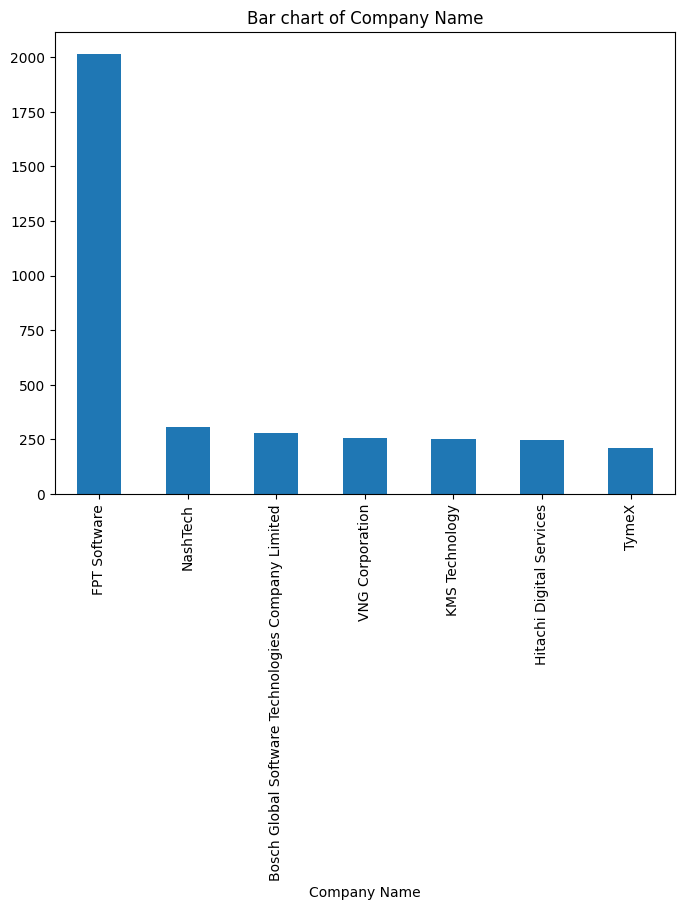

Class count of Country:

Country
Vietnam                 3624
United States            779
Singapore                773
Japan                    757
South Korea              468
Germany                  458
United Kingdom           362
Switzerland              240
Australia                199
Norway                   134
France                   127
Canada                   120
Denmark                  109
Belgium                   75
Sweden                    70
Italy                     57
United Arab Emirates      25
India                     18
Cambodia                   6
Netherlands                6
Estonia                    4
Name: count, dtype: int64


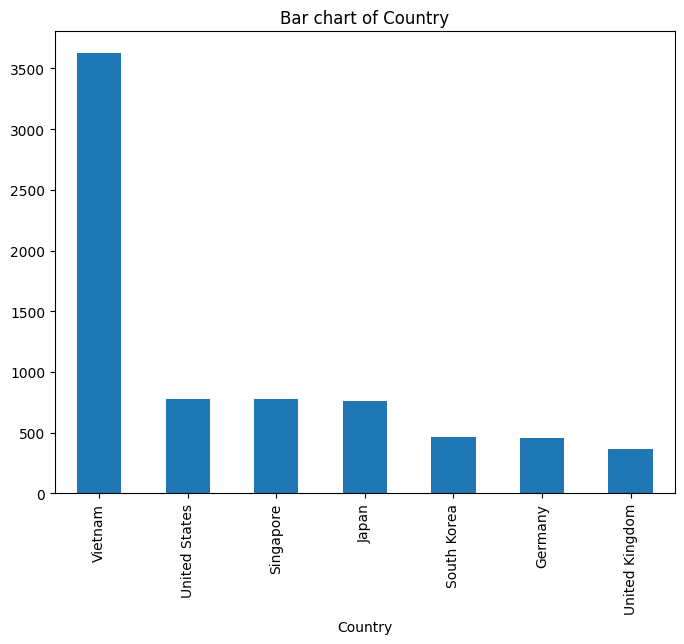

Class count of Recommend:

Recommend
Yes    7384
No     1027
Name: count, dtype: int64


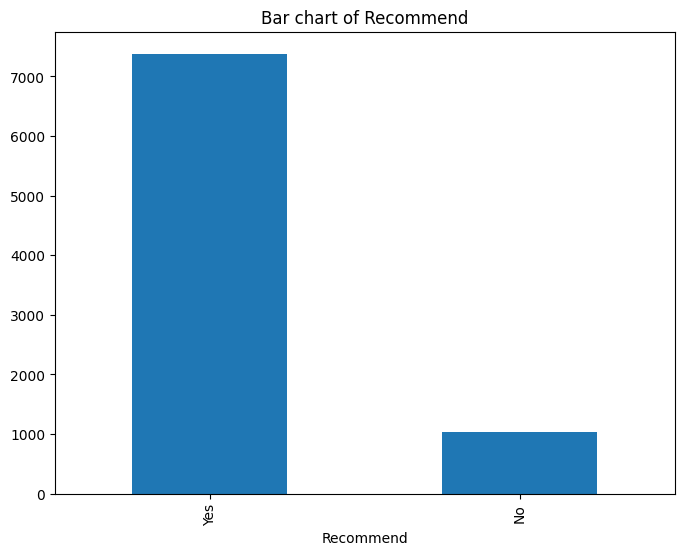

Class count of Working days:

Working days
Monday - Friday      8338
Monday - Saturday      73
Name: count, dtype: int64


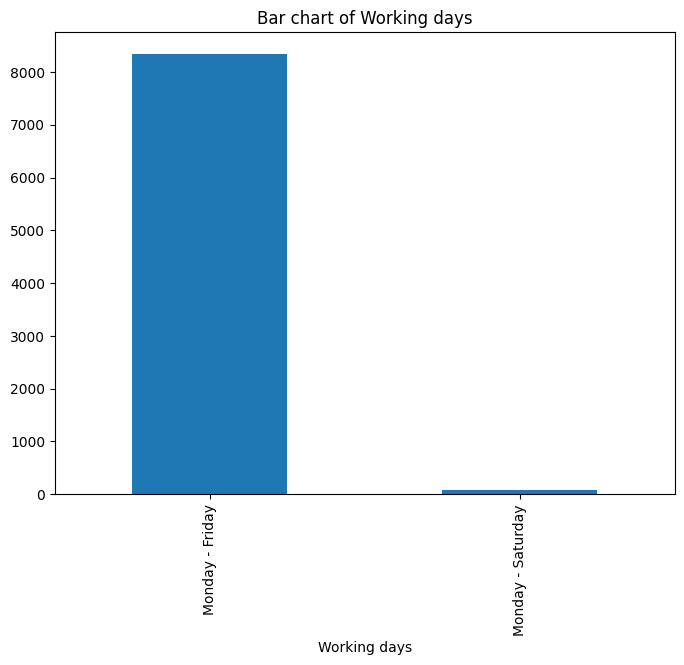

Class count of Overtime Policy:

Overtime Policy
No OT                    4669
Extra salary for OT      3135
                          529
Extra days off for OT      78
Name: count, dtype: int64


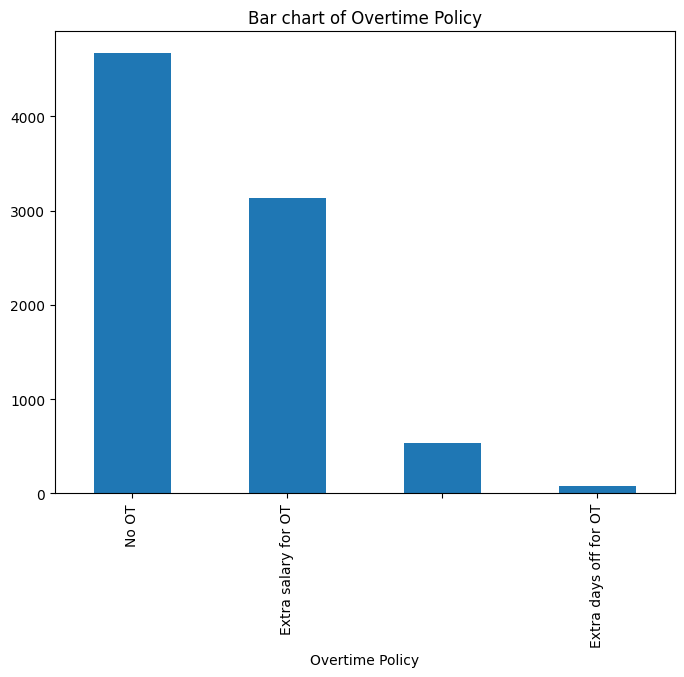

In [69]:
cat_cols = ['Company Name','Country','Recommend','Working days','Overtime Policy']
for col in cat_cols:
    _analyzer.analyze_category_variable(col, data)

#### Phân tích biến số

=====
central tendency of id: {'mean': np.float64(236.88660892738176), 'median': 182.0, 'mode': np.int64(182), 'min': 4, 'max': 477, 'range': 473}
=====
Dispersion of id: 
 {'range': 473, 'q1': np.float64(182.0), 'q3': np.float64(306.0), 'iqr': np.float64(124.0), 'var': 12540.403993628923, 'skew': np.float64(0.42175630460224794), 'kurtosis': np.float64(-0.37623204440724534)}
=====


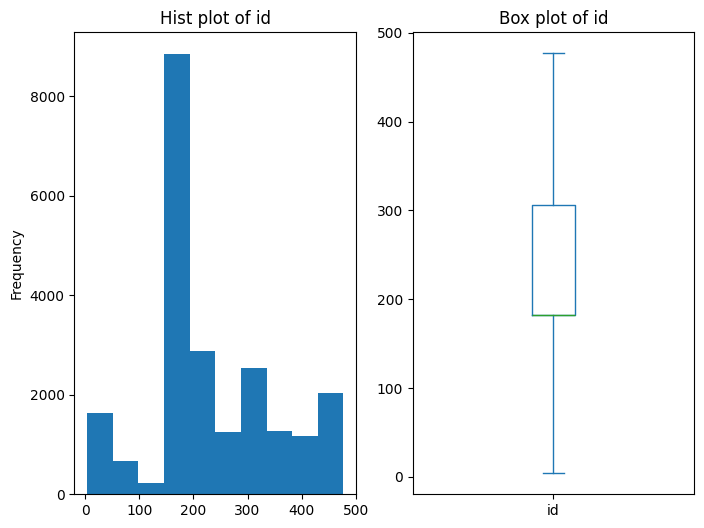

=====
central tendency of Rating: {'mean': np.float64(3.024028425494115), 'median': 3.0, 'mode': np.int64(3), 'min': 1, 'max': 5, 'range': 4}
=====
Dispersion of Rating: 
 {'range': 4, 'q1': np.float64(2.0), 'q3': np.float64(4.0), 'iqr': np.float64(2.0), 'var': 1.2967931341298649, 'skew': np.float64(0.28558343949216564), 'kurtosis': np.float64(-0.6173943515794731)}
=====


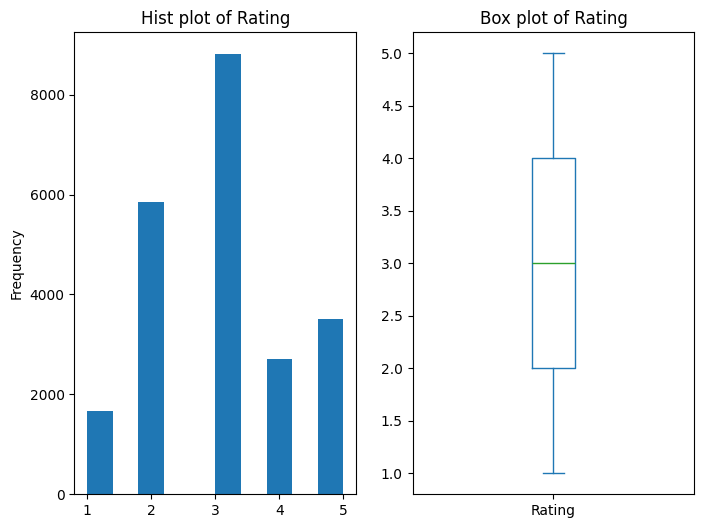

=====
central tendency of Salary & benefits: {'mean': np.float64(2.8832333999555853), 'median': 3.0, 'mode': np.int64(3), 'min': 1, 'max': 5, 'range': 4}
=====
Dispersion of Salary & benefits: 
 {'range': 4, 'q1': np.float64(2.0), 'q3': np.float64(4.0), 'iqr': np.float64(2.0), 'var': 1.281336972927224, 'skew': np.float64(0.29218165790595996), 'kurtosis': np.float64(-0.6299292439999156)}
=====


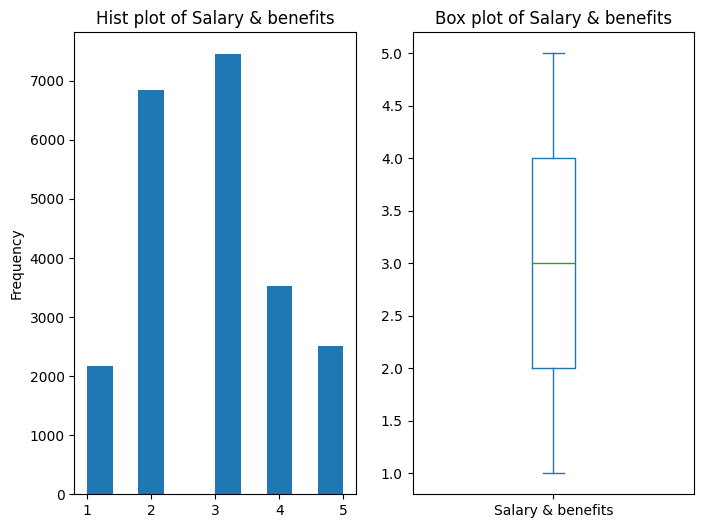

=====
central tendency of Training & learning: {'mean': np.float64(3.2127914723517654), 'median': 3.0, 'mode': np.int64(3), 'min': 1, 'max': 5, 'range': 4}
=====
Dispersion of Training & learning: 
 {'range': 4, 'q1': np.float64(2.0), 'q3': np.float64(4.0), 'iqr': np.float64(2.0), 'var': 1.343675759792396, 'skew': np.float64(-0.1747607565269985), 'kurtosis': np.float64(-0.7151701975180784)}
=====


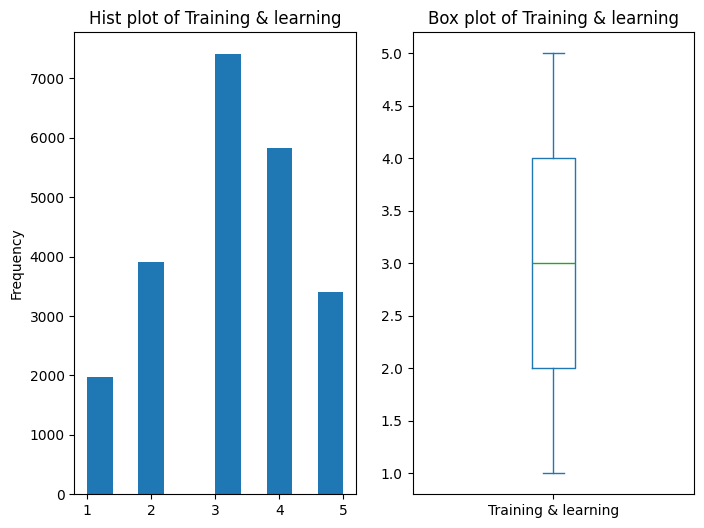

=====
central tendency of Management cares about me: {'mean': np.float64(2.9580279813457695), 'median': 3.0, 'mode': np.int64(3), 'min': 1, 'max': 5, 'range': 4}
=====
Dispersion of Management cares about me: 
 {'range': 4, 'q1': np.float64(2.0), 'q3': np.float64(4.0), 'iqr': np.float64(2.0), 'var': 1.4943295923590874, 'skew': np.float64(0.09991760134030479), 'kurtosis': np.float64(-0.8519047514238345)}
=====


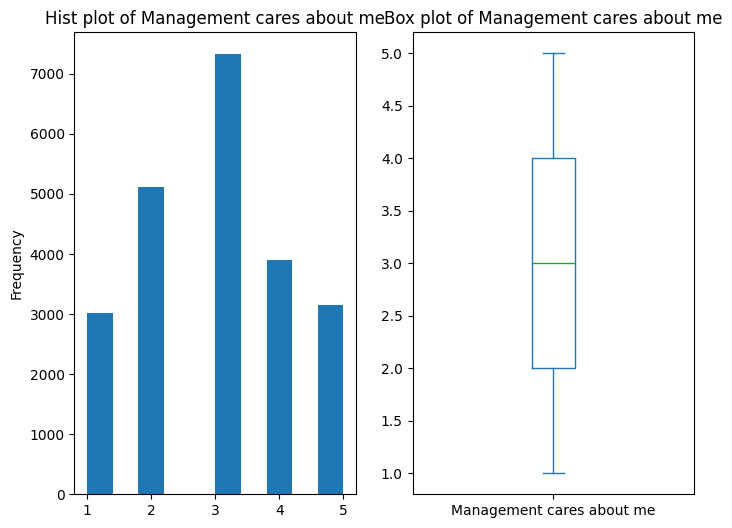

=====
central tendency of Culture & fun: {'mean': np.float64(3.304063957361759), 'median': 3.0, 'mode': np.int64(3), 'min': 1, 'max': 5, 'range': 4}
=====
Dispersion of Culture & fun: 
 {'range': 4, 'q1': np.float64(3.0), 'q3': np.float64(4.0), 'iqr': np.float64(1.0), 'var': 1.3633462799992582, 'skew': np.float64(-0.26889227825585704), 'kurtosis': np.float64(-0.6804686118060883)}
=====


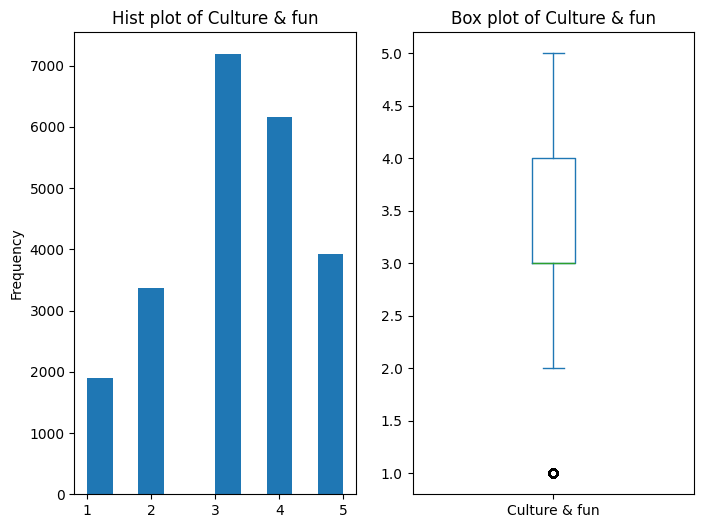

=====
central tendency of Office & workspace: {'mean': np.float64(3.579213857428381), 'median': 4.0, 'mode': np.int64(4), 'min': 1, 'max': 5, 'range': 4}
=====
Dispersion of Office & workspace: 
 {'range': 4, 'q1': np.float64(3.0), 'q3': np.float64(4.0), 'iqr': np.float64(1.0), 'var': 1.0881883310506413, 'skew': np.float64(-0.4688541057891482), 'kurtosis': np.float64(-0.19206769673733293)}
=====


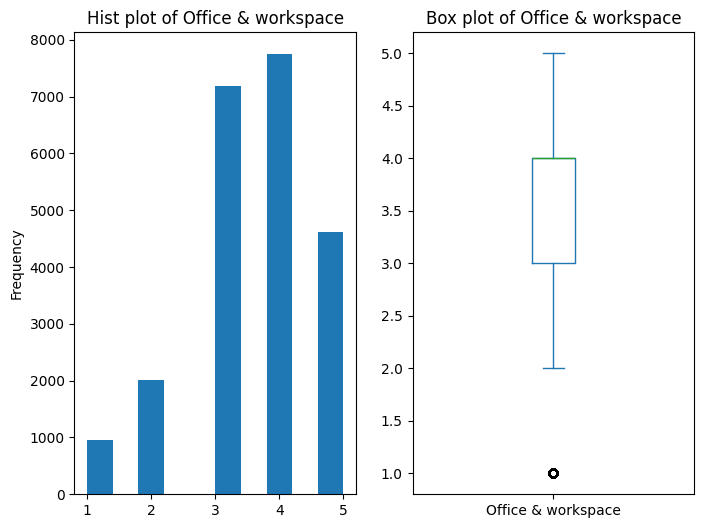

=====
central tendency of word_count_positive: {'mean': np.float64(2.5537197423939597), 'median': 1.0, 'mode': np.int64(0), 'min': 0, 'max': 40, 'range': 40}
=====
Dispersion of word_count_positive: 
 {'range': 40, 'q1': np.float64(0.0), 'q3': np.float64(4.0), 'iqr': np.float64(4.0), 'var': 12.05639939467024, 'skew': np.float64(2.2335629938760135), 'kurtosis': np.float64(8.725949367806791)}
=====


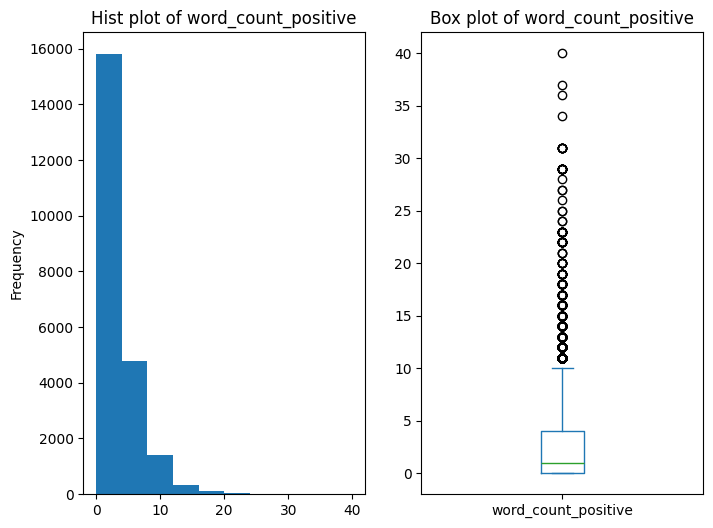

=====
central tendency of word_count_negative: {'mean': np.float64(0.9284477015323118), 'median': 0.0, 'mode': np.int64(0), 'min': 0, 'max': 29, 'range': 29}
=====
Dispersion of word_count_negative: 
 {'range': 29, 'q1': np.float64(0.0), 'q3': np.float64(2.0), 'iqr': np.float64(2.0), 'var': 3.3142813026192375, 'skew': np.float64(3.9001950396357095), 'kurtosis': np.float64(30.44714486443857)}
=====


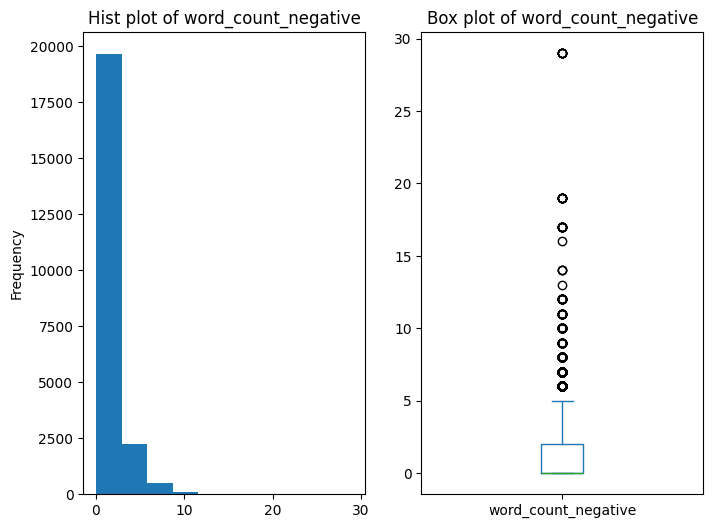

=====
central tendency of label_sentiment: {'mean': np.float64(1.0), 'median': 1.0, 'mode': np.int64(0), 'min': 0, 'max': 2, 'range': 2}
=====
Dispersion of label_sentiment: 
 {'range': 2, 'q1': np.float64(0.0), 'q3': np.float64(2.0), 'iqr': np.float64(2.0), 'var': 0.6666962778715466, 'skew': np.float64(0.0), 'kurtosis': np.float64(-1.5000666281703905)}
=====


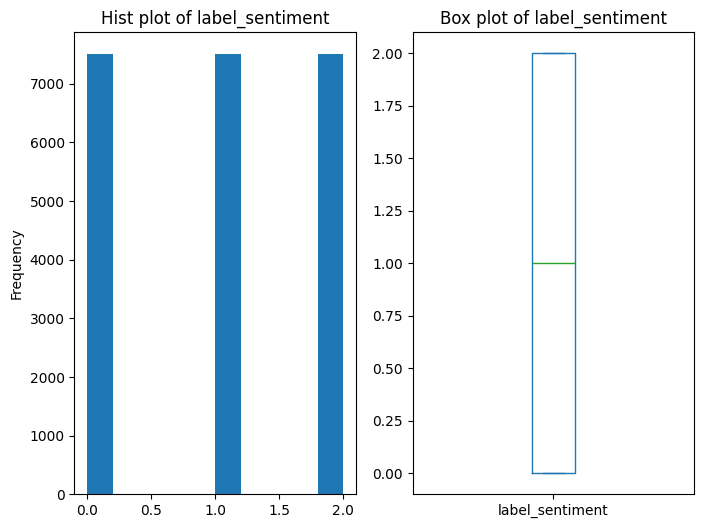

In [70]:
for col in num_cols:
    _analyzer.analyze_numeric_variable(col, df)

#### Phân tích biến số phân loại và biến phân loại

In [71]:
cat_cols

['Company Name', 'Country', 'Recommend', 'Working days', 'Overtime Policy']

=====Analyze of Recommend and label=====


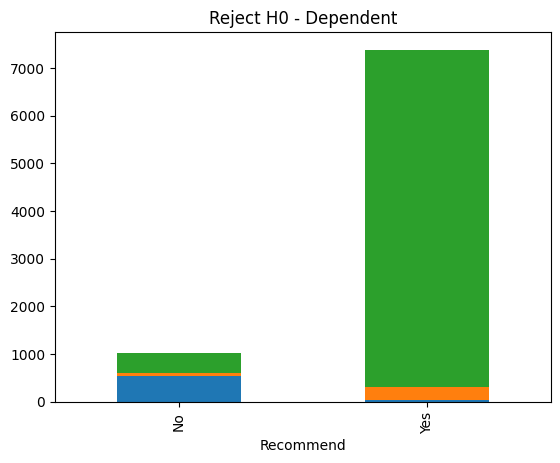

label      negative  neutral  positive
Recommend                             
No              529       80       418
Yes              41      256      7087
Reject H0 - Dependent


In [72]:
# Phân tích 2 biến category
cat_cols = ['Recommend', 'label']
n = len(cat_cols)
# Vòng lặp for để thay thế giá trị của var1 và var2
for i in range(n):
    for j in range(i+1, n):
        var1 = cat_cols[i]
        var2 = cat_cols[j]
        _analyzer.analyze_category_vs_category(var1=var1, var2=var2, df=data)
        twoway_table = _analyzer.create_tw_table(var1=var1, var2=var2, df=data)
        print(twoway_table)
        print(_analyzer.use_chi_2_evaluation(twoway_table))

### Nhận xét: 2 biến Recommend và biến rating_category là 2 biến phụ thuộc

#### **Phân tích tổng quát sử dụng YDATA**

In [73]:
profile = ProfileReport(data, explorative=True)
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

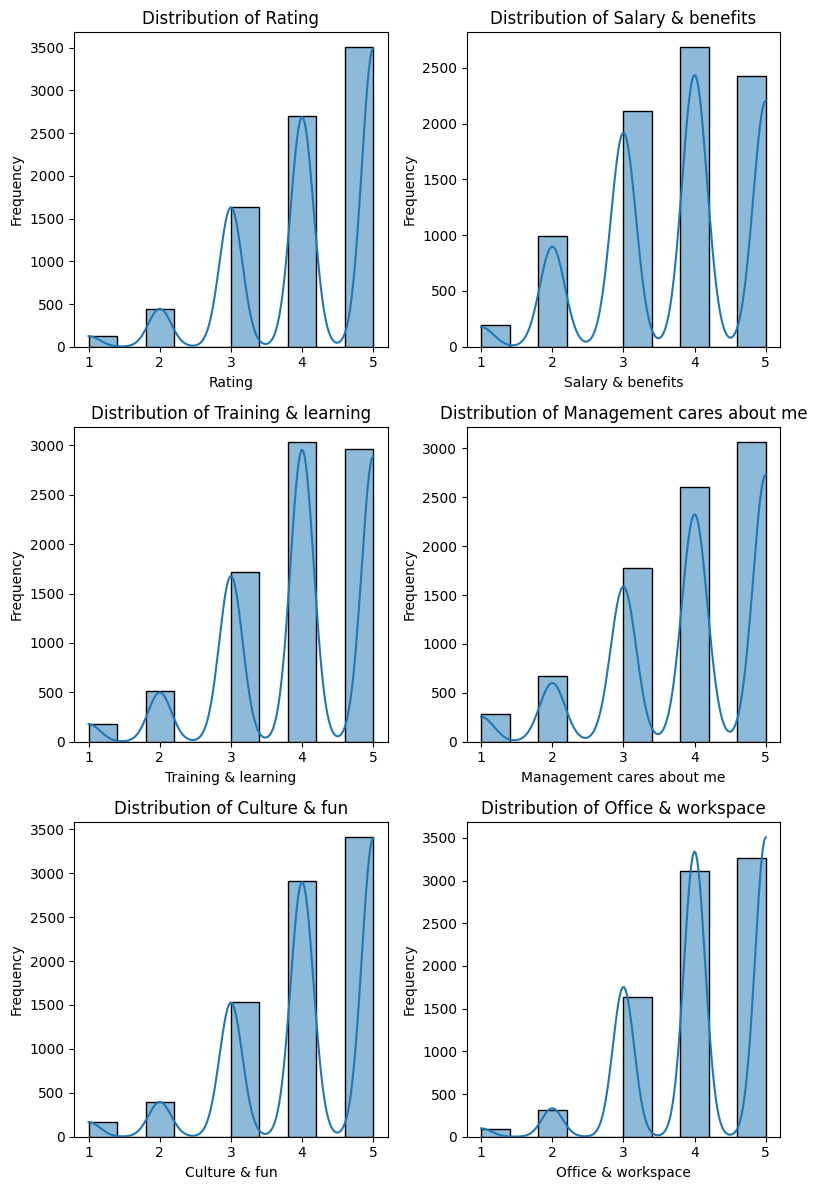

In [74]:
# Các cột cần phân tích
eda_columns = [
    "Rating",
    "Salary & benefits",
    "Training & learning",
    "Management cares about me",
    "Culture & fun",
    "Office & workspace"
]

# Vẽ biểu đồ phân phối
plt.figure(figsize=(8, 12))
for i, column in enumerate(eda_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[column], bins=10, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Modeling & Evaluation

Training XGBoost...
XGBoost - Accuracy: 0.9556
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1501
           1       0.92      1.00      0.96      1501
           2       0.99      0.93      0.96      1501

    accuracy                           0.96      4503
   macro avg       0.96      0.96      0.96      4503
weighted avg       0.96      0.96      0.96      4503




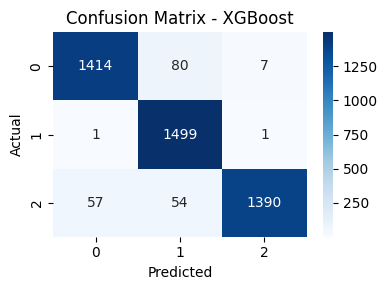

Training LightGBM...
LightGBM - Accuracy: 0.9498
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1501
           1       0.92      1.00      0.96      1501
           2       0.99      0.91      0.95      1501

    accuracy                           0.95      4503
   macro avg       0.95      0.95      0.95      4503
weighted avg       0.95      0.95      0.95      4503




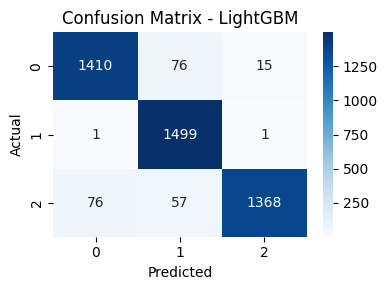

Training RandomForest...
RandomForest - Accuracy: 0.9634
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1501
           1       0.93      1.00      0.96      1501
           2       1.00      0.94      0.97      1501

    accuracy                           0.96      4503
   macro avg       0.97      0.96      0.96      4503
weighted avg       0.97      0.96      0.96      4503




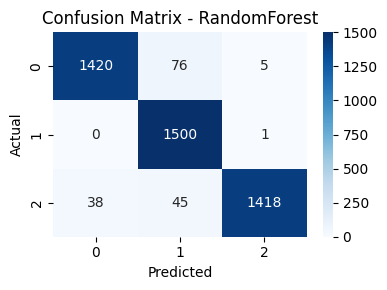

Training LogisticRegression...
LogisticRegression - Accuracy: 0.8805
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1501
           1       0.83      0.97      0.90      1501
           2       0.94      0.85      0.89      1501

    accuracy                           0.88      4503
   macro avg       0.89      0.88      0.88      4503
weighted avg       0.89      0.88      0.88      4503




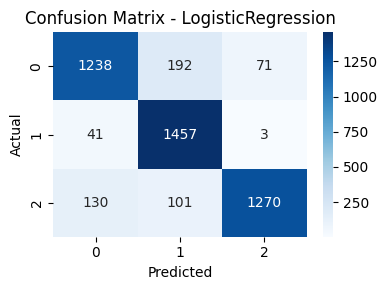

Training Naive Bayes...
Naive Bayes - Accuracy: 0.7255
              precision    recall  f1-score   support

           0       0.72      0.50      0.59      1501
           1       0.75      0.98      0.85      1501
           2       0.69      0.70      0.70      1501

    accuracy                           0.73      4503
   macro avg       0.72      0.73      0.71      4503
weighted avg       0.72      0.73      0.71      4503




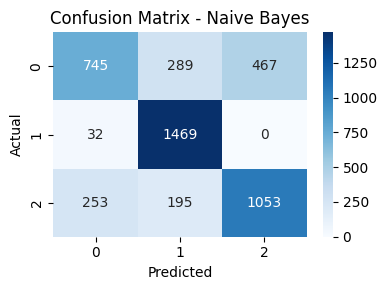

Training SVM...
SVM - Accuracy: 0.8750
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1501
           1       0.82      0.97      0.89      1501
           2       0.94      0.83      0.88      1501

    accuracy                           0.87      4503
   macro avg       0.88      0.87      0.87      4503
weighted avg       0.88      0.87      0.87      4503




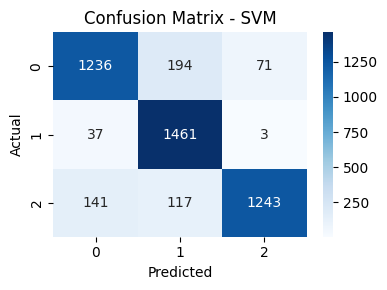


=== Tổng kết đánh giá các mô hình ===
                Model  Accuracy  Precision    Recall  F1 Score  R2 Score
2        RandomForest  0.963358   0.965026  0.963358  0.963426  0.902065
0             XGBoost  0.955585   0.957606  0.955585  0.955595  0.869420
1            LightGBM  0.949811   0.951721  0.949811  0.949680  0.833777
3  LogisticRegression  0.880524   0.885383  0.880524  0.879998  0.619920
5                 SVM  0.874972   0.880807  0.874972  0.874324  0.600600
4         Naive Bayes  0.725516   0.722747  0.725516  0.712143 -0.131246


In [79]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, r2_score,
    roc_auc_score, roc_curve
)

# Define features for model training
feature_cols = [
    'word_count_positive',
    'word_count_negative',
    'Salary & benefits',
    'Training & learning',
    'Management cares about me',
    'Culture & fun',
    'Office & workspace'
]
X = df[feature_cols]
y = df['label_sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the models
models = {
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42, verbose=-1),
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'Naive Bayes': MultinomialNB(),
    'SVM': LinearSVC()
}

results = []

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    # Calculate evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name} - Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred) + "\n")

    # Confusion Matrix đẹp
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    results.append({
        'Model': model_name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'R2 Score': r2
    })

df_results = pd.DataFrame(results)
print("\n=== Tổng kết đánh giá các mô hình ===")
print(df_results.sort_values(by="F1 Score", ascending=False))


=== Tổng kết đánh giá các mô hình ===
                Model  Accuracy  Precision    Recall  F1 Score  R2 Score
1        RandomForest  0.963358   0.965026  0.963358  0.963426  0.902065
2             XGBoost  0.955585   0.957606  0.955585  0.955595  0.869420
3            LightGBM  0.949811   0.951721  0.949811  0.949680  0.833777
4  LogisticRegression  0.880524   0.885383  0.880524  0.879998  0.619920
5                 SVM  0.874972   0.880807  0.874972  0.874324  0.600600
6         Naive Bayes  0.725516   0.722747  0.725516  0.712143 -0.131246

=== Biểu đồ so sánh hiệu suất các mô hình ===


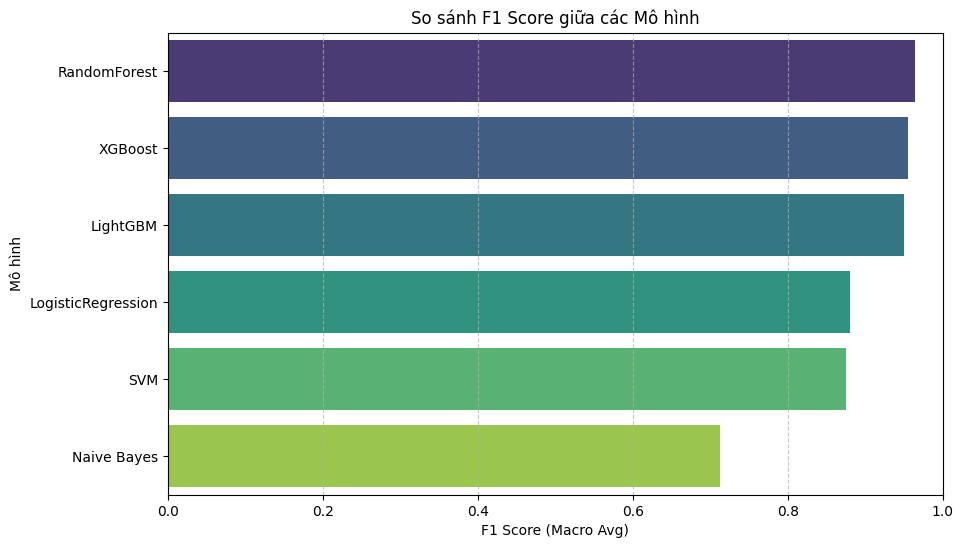

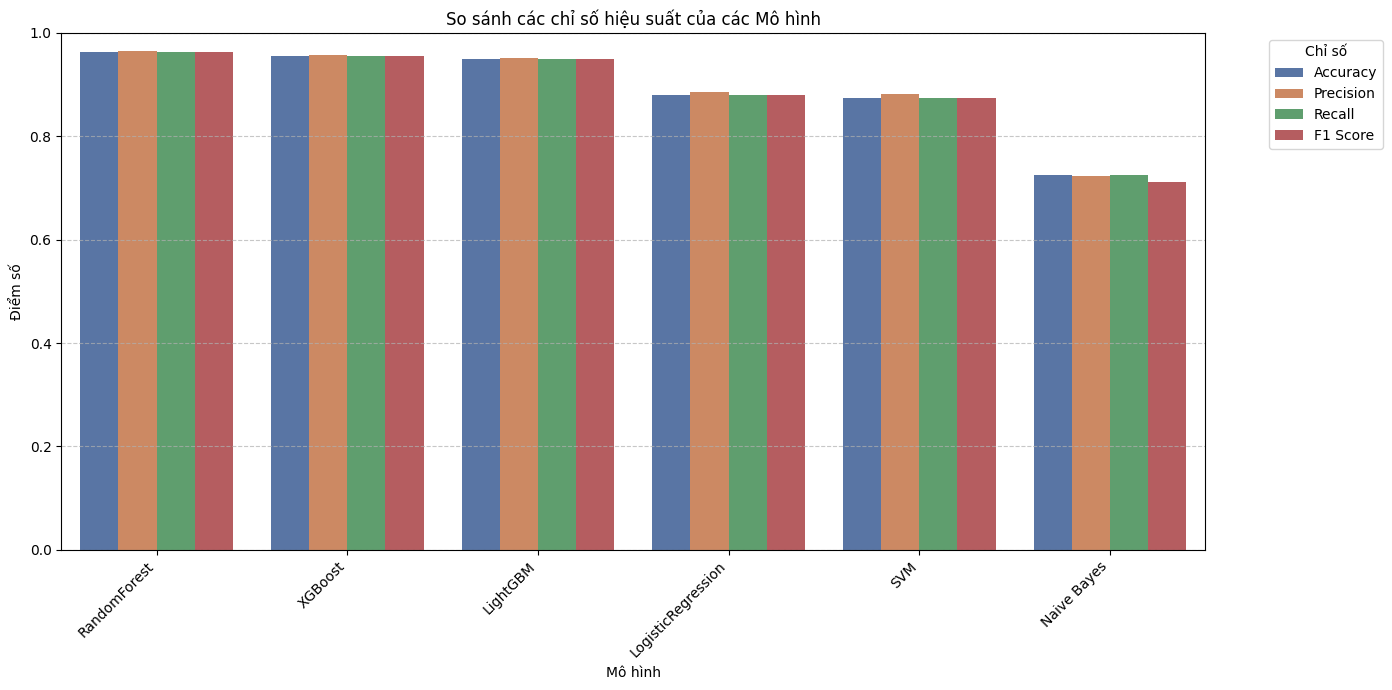

In [82]:
# --- 6. Hiển thị Kết quả Tổng hợp Dạng Bảng ---
df_results = pd.DataFrame(results)
print("\n=== Tổng kết đánh giá các mô hình ===")
df_results_sorted = df_results.sort_values(by="F1 Score", ascending=False)
df_results_sorted.reset_index(drop=True, inplace=True)
df_results_sorted.index += 1 # Bắt đầu index từ 1
print(df_results_sorted)

# --- 7. Vẽ biểu đồ so sánh giữa các mô hình ---
print("\n=== Biểu đồ so sánh hiệu suất các mô hình ===")

# Biểu đồ 1: So sánh F1 Score của các mô hình
plt.figure(figsize=(10, 6))
sns.barplot(x='F1 Score', y='Model', data=df_results_sorted, palette='viridis')
plt.title('So sánh F1 Score giữa các Mô hình')
plt.xlabel('F1 Score (Macro Avg)')
plt.ylabel('Mô hình')
plt.xlim(0, 1) # Giới hạn trục x từ 0 đến 1
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Biểu đồ 2: So sánh nhiều chỉ số (Accuracy, Precision, Recall, F1 Score)
# Chuẩn bị dữ liệu cho biểu đồ cột nhóm
df_melted = df_results_sorted.melt(id_vars='Model', value_vars=['Accuracy', 'Precision', 'Recall', 'F1 Score'],
                                   var_name='Metric', value_name='Score')

plt.figure(figsize=(14, 7))
sns.barplot(x='Model', y='Score', hue='Metric', data=df_melted, palette='deep')
plt.title('So sánh các chỉ số hiệu suất của các Mô hình')
plt.xlabel('Mô hình')
plt.ylabel('Điểm số')
plt.ylim(0, 1) # Giới hạn trục y từ 0 đến 1
plt.xticks(rotation=45, ha='right') # Xoay nhãn trục x để dễ đọc
plt.legend(title='Chỉ số', bbox_to_anchor=(1.05, 1), loc='upper left') # Đặt legend ra ngoài
plt.tight_layout() # Đảm bảo bố cục chặt chẽ
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Save Model

In [85]:
import joblib
random_forest_model = models['RandomForest']
xgboost_model = models['XGBoost']
LightGBM_model = models['LightGBM']
logistic_model = models['LogisticRegression']
# Save vào đường dẫn
joblib.dump(random_forest_model, '/content/gdrive/MyDrive/DL07_K304_ĐaoTuanThinh_TruongVanLe/Project1/Model/random_forest_model.pkl')
joblib.dump(random_forest_model, '/content/gdrive/MyDrive/DL07_K304_ĐaoTuanThinh_TruongVanLe/Project1/Model/xgboost_model.pkl')
joblib.dump(random_forest_model, '/content/gdrive/MyDrive/DL07_K304_ĐaoTuanThinh_TruongVanLe/Project1/Model/LightGBM_model.pkl')
joblib.dump(random_forest_model, '/content/gdrive/MyDrive/DL07_K304_ĐaoTuanThinh_TruongVanLe/Project1/Model/logistic_model.pkl')
print('Lưu model thành công')

Lưu model thành công


In [86]:
# Dự đoán và đánh giá trên tập test cho mô hình tốt nhất
import joblib
# Load the saved model
loaded_model = joblib.load('/content/gdrive/MyDrive/DL07_K304_ĐaoTuanThinh_TruongVanLe/Project1/Model/random_forest_model.pkl')

y_pred = loaded_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9633577614923384
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1501
           1       0.93      1.00      0.96      1501
           2       1.00      0.94      0.97      1501

    accuracy                           0.96      4503
   macro avg       0.97      0.96      0.96      4503
weighted avg       0.97      0.96      0.96      4503

